# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## План проекта
**1. Проведение обзора данных**

**Первичное исследование данных:** 
* Импорт необходимых библиотек;
* Чтение файлов и сохранение полученных данных в переменные;
* Получение общей информации о таблицах (head, info, describe);
* Графическое представление данных из таблиц
* Выводы

**2. Построение модели машинного обучения:**
* Разбивка данных на выборки
* Выбор оптимальных гиперпараметров для моделей
* Выбор оптимальной модели
* Проверка выбранной модели на тестовой выборке
* Проверка выбранной модели на адекватность
* Выводы

**3. Общий вывод**


## Первичное исследование данных

### Загрузка данных

In [22]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.dummy import DummyClassifier

In [23]:
# Напишем функцию для первичной проверки данных
def check_data(data_df):
    print ('\033[1m' + 'Изучим исходные данные'+ '\033[0m')
    print(data_df.info())
    print(data_df.shape)
        
    missed_cells = data_df.isnull().sum().sum()/(data_df.shape[0]*(data_df.shape[1]-1))
    missed_rows = sum(data_df.isnull().sum(axis = 1)>0)/data_df.shape[0]
    print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
    print ('Количество пропусков: {:.0f}'.format(data_df.isnull().sum().sum()))
    print ('Доля пропусков: {:.1%}'.format(missed_cells)+ '\033[0m')
    print ('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    ## Проверим дубликаты
    print ('\033[1m' + '\nПроверка на дубликаты'+ '\033[0m')
    print('Количество полных дубликатов: ', data_df.duplicated().sum())
        
    ## Посмотрим на сами данные
    print ('\033[1m' + '\nПервые пять строк датасета'+ '\033[0m')
    display(data_df.head())
    
    print('\033[1m' + '\nОписание количественных данных:'+ '\033[0m')
    display(data_df.describe().T)

In [24]:
def plot_hist(data, col_column):
    '''
    Функция отрисовки гистограмм и ящика с усами для количесвтенных переменных.
    На вход: исходная таблица и список количественных переменных.
    На выходе: графики
    '''
    rows = len(col_column)
    f, ax = plt.subplots(rows,2, figsize=(8, 15))
    f.tight_layout()
    f.set_figheight(30)
    f.set_figwidth(14)
    plt.rcParams.update({'font.size': 18})
    
    for i, col in enumerate(col_column):         
        sns.histplot(data[col], kde=True, bins=24, ax = ax[i, 0])                    
        sns.boxplot(data[col], ax = ax[i, 1])

        ax[i, 0].set_xlabel(col)
        ax[i, 1].set_xlabel(col)
        ax[i, 0].set_ylabel('Количество')
    plt.suptitle("Гистограмма и ящик с усами для количественных данных", fontsize=22, y=1.01)
    plt.show()

In [25]:
#Считываем данные из csv-файла в датафрейм и сохраняем в переменной data
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [26]:
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Загруженная таблица соответствует заданию.

### Первичный осмотр данных

In [27]:
check_data(data)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None
(3214, 5)

Проверка пропусков
Количество пропусков: 0
Доля пропусков: 0.0%
Доля строк содержащих пропуски: 0.0%

Проверка на дубликаты
Количество полных дубликатов:  0

Первые пять строк датасета


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0



Описание количественных данных:


,count,mean,std,min,25%,50%,75%,max
calls,3214.0,63.038892,33.236368,0.0,40.0000,62.000,82.0000,244.00
minutes,3214.0,438.208787,234.569872,0.0,274.5750,430.600,571.9275,1632.06
messages,3214.0,38.281269,36.148326,0.0,9.0000,30.000,57.0000,224.00
mb_used,3214.0,17207.673836,7570.968246,0.0,12491.9025,16943.235,21424.7000,49745.73
is_ultra,3214.0,0.306472,0.461100,0.0,0.0000,0.000,1.0000,1.00


In [28]:
# ГРАФИЧЕСКИЙ АНАЛИЗ количественных данных данных
num_features = data.select_dtypes(exclude=[object]).columns

# Проверка
num_features

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

In [29]:
num_features = num_features.drop(['is_ultra'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

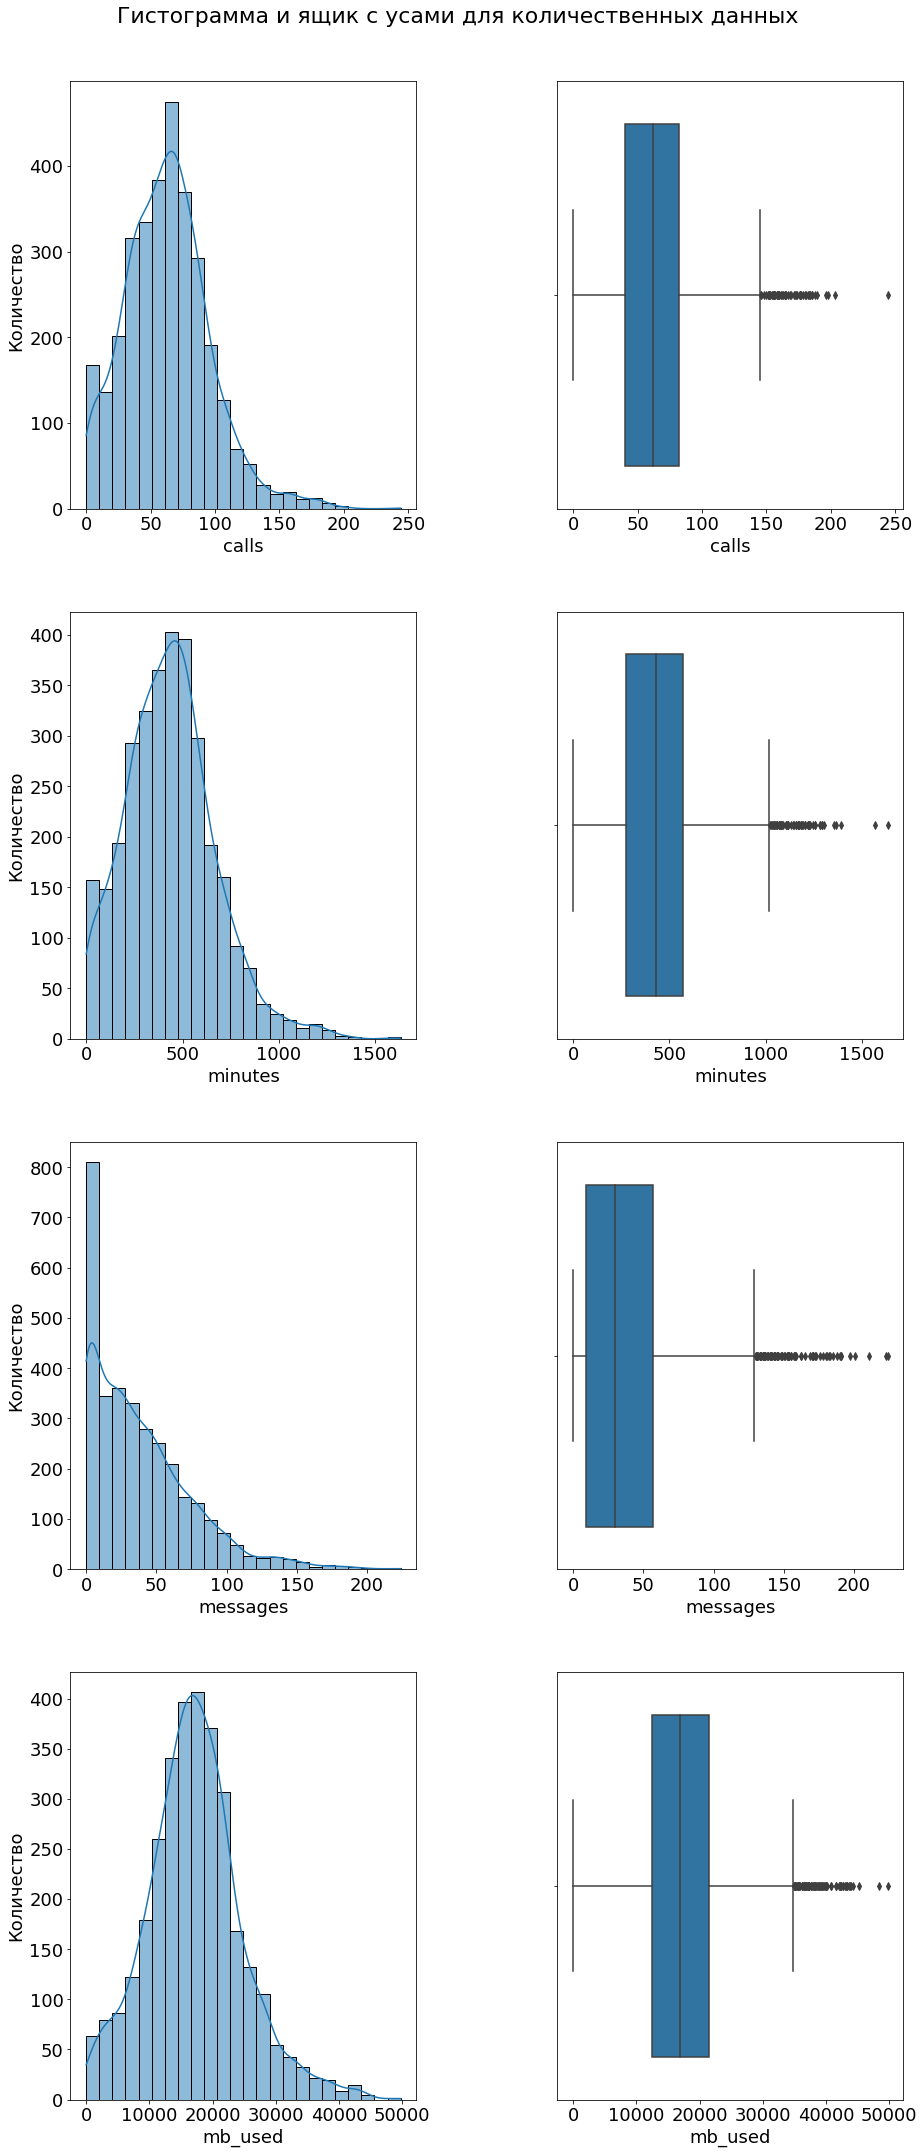

In [30]:
plot_hist(data, num_features)

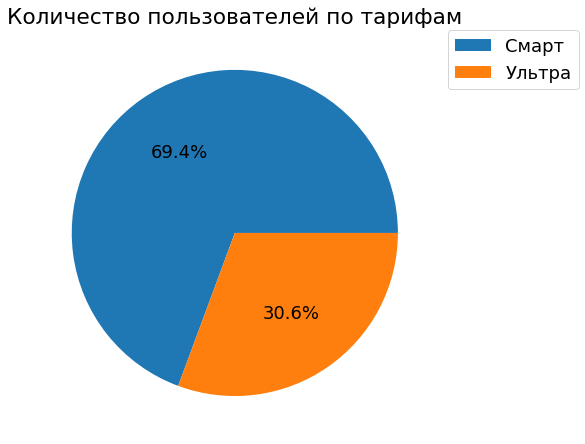

In [31]:
# ГРАФИЧЕСКИЙ АНАЛИЗ категориальных данных
data_grouped = data.groupby('is_ultra')['is_ultra'].agg(['count'])
ax = data_grouped['count'].plot(kind="pie", autopct='%1.1f%%', legend=True, title='Количество пользователей по тарифам', ylabel='', figsize = (7.5,7.5), labeldistance=None, labels = ['Смарт', 'Ультра'])
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

**Вывод: Исходя из полученных графиков и информации о датасете видно что датасет предобработан: в нем нету пропущенных значений, дубдикатов и некорректных значений. Можно приступать к исследованию.**

## Построение модели машинного обучения

### Разбивка данных на выборки

In [32]:
# Создадим датасет с признакими, исключив из исходного датасета целевой признак
features = data.drop(['is_ultra'], axis=1)
# Сздадим датасет с целевым признаком
target = data['is_ultra']

In [33]:
# Разделим данные. Так как нам нужно выделить три выборки: обучающую, валидационную и тестовую, \
# то нам нужно разделить данные в отношении 3:1:1.
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345) # отделим 40% данных для валидационной и тестовой выборки

In [34]:
# Разделим 40% данных пополам между валидационной и тестовой выборками (по 20% данных)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

In [35]:
print('Размер обучающей выборки (признаки) -', features_train.shape[0])
print('Размер обучающей выборки (целевой признак) -', target_train.shape[0])
print('Размер тестовой выборки (признаки) -', features_test.shape[0])
print('Размер тестовой выборки (признаки) -', target_test.shape[0])
print('Размер валидационной выборки (признаки) -', features_valid.shape[0])
print('Размер валидационной выборки (признаки) -', target_valid.shape[0])

Размер обучающей выборки (признаки) - 1928
Размер обучающей выборки (целевой признак) - 1928
Размер тестовой выборки (признаки) - 643
Размер тестовой выборки (признаки) - 643
Размер валидационной выборки (признаки) - 643
Размер валидационной выборки (признаки) - 643


### Исследование моделей

In [36]:
def best_model(tree_depth, n_trees, iter, features_train, target_train, features_valid, target_valid):
  '''
  Функция находит значения гиперпараметров для наилучший модели для каждого типа моделей
  (модель решающего дерева, модель случайного леса, модель логистической регресии).
  На вход: значения гиперпараметров, тестовая и валидационная выборки.
  На выходе: значения Accuracy и гиперпаметров для наилучшей модели каждого типа моделей
  '''
  best_model_dtc = None
  best_result_dtc = 0
  best_depth = 0
  for depth in range(1, tree_depth):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучаем модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    result = model.score(features_valid,target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result_dtc:
      best_depth = depth
      best_model_dtc = model # сохраняем наилучшую модель
      best_result_dtc = result # сохрасохраняемните наилучшее значение метрики accuracy на валидационных данных

  print("Accuracy наилучшей модели решающего дерева на валидационной выборке:",
        best_result_dtc, "Глубина дерева:", best_depth)

  best_model_rfc = None
  best_result_rfc = 0
  best_est = 0
  best_depth = 0
  for est in range(10, n_trees, 10):
    for depth in range (1, tree_depth):
        # обучаем модель с заданным количеством деревьев
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
        result = model.score(features_valid,target_valid) # посчитаем качество модели на валидационной выборке
        if result > best_result_rfc:
            best_model_rfc = model # сохраняем наилучшую модель
            best_result_rfc = result # сохраняем наилучшее значение метрики accuracy на валидационных данных
            best_est = est
            best_depth = depth

  print("Accuracy наилучшей модели случайного леса на валидационной выборке:",
        best_result_rfc, "Количество деревьев:", best_est, "Максимальная глубина дерева:", best_depth)

  best_model_lr = None
  best_result_lr = 0
  best_iter = 0
  for iter in range(100, iter, 100):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter) # обучаем модель
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result_lr:
        best_model_lr = model # сохраняем наилучшую модель
        best_result_lr = result # сохраняем наилучшее значение метрики accuracy на валидационных данных
        best_iter = iter

  print("Accuracy наилучшей модели логистической регресии на валидационной выборке:",
        best_result_lr, "Количество итераций:", best_iter)

  #выберем из трех типов моделей лучшую и сохраним ее в переменную best_model
  best_results = []
  best_result = 0
  best_model = None
  best_results.append(best_result_dtc)
  best_results.append(best_result_rfc)
  best_results.append(best_result_lr)
  for result in best_results:
    if result > best_result:
        best_result = result
  if best_results.index(best_result) == 0:
    best_model = best_result_dtc
  elif best_results.index(best_result) == 1:
    best_model = best_model_rfc
  elif best_results.index(best_result) == 2:
    best_model = best_model_lr
  
  return best_model

In [37]:
# Задаем гиперпараметры
tree_depth = 11 #грубина дерева
n_trees = 51 #количество деревьев
iter = 1000 #количество итераций

# Найдем модель с наибольшим значением Accuracy на валидационной выборке
model = best_model(tree_depth, n_trees, iter,features_train, target_train, features_valid, target_valid)

Accuracy наилучшей модели решающего дерева на валидационной выборке: 0.7993779160186625 Глубина дерева: 7
Accuracy наилучшей модели случайного леса на валидационной выборке: 0.8133748055987559 Количество деревьев: 10 Максимальная глубина дерева: 9
Accuracy наилучшей модели логистической регресии на валидационной выборке: 0.6842923794712286 Количество итераций: 100


Как видим, самое большое значение Accuracy на валидационной выборке - для модели случайного леса с количеством деревьев равным 10 и максимальной глубиной дерева 9. 

In [38]:
'''# Обучим модель, самое большим значением Accuracy на валидационной выборке по известным гиперпараметрам
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=9)
model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
result_valid = model.score(features_valid,target_valid) # посчитаем качество модели на валидационной выборке
print("Accuracy модели на валидационной выборке:",  result_valid)'''

'# Обучим модель, самое большим значением Accuracy на валидационной выборке по известным гиперпараметрам\nmodel = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=9)\nmodel.fit(features_train, target_train) # обучаем модель на тренировочной выборке\nresult_valid = model.score(features_valid,target_valid) # посчитаем качество модели на валидационной выборке\nprint("Accuracy модели на валидационной выборке:",  result_valid)'

### Проверка модели на тестовой выборке

Чтобы правильно оценить готовую модель проверим ее на тестовой выборке.

In [39]:
result_test = model.score(features_test,target_test) # посчитаем качество модели на тестовой выборке
print("Accuracy модели на тестовой выборке:",  result_test)

Accuracy модели на тестовой выборке: 0.7853810264385692


Как видно, доля правильных ответов на тестовой выборке немного снизилась по сравнению с ответами на валидационной выборке. Но доля ответов (0.785) все еще высока и подходит по условиям поставленной задачи (больше 0.75).

### Проверка модели на адекватность

Для оценки модели на адекватность, модель должна быть умнее тривиальной модели. В нашем исследовании в качестве тривиальной модели будем использовать модель DummyClassifier со статегией most_frequent, которая возвращает наиболее часто встречающееся значение целевого параметра.

In [40]:
model_dummy = DummyClassifier(random_state=12345, strategy = 'most_frequent')
model_dummy.fit(features_train, target_train)
result_dummy_valid = model_dummy.score(features_valid,target_valid) # посчитаем качество модели на валидационной выборке
print("Accuracy тривиальной модели на валидационной выборке:",  result_dummy_valid)
result_dummy_test = model_dummy.score(features_test,target_test) # посчитаем качество модели на тестовой выборке
print("Accuracy тривиальной модели на тестовой выборке:",  result_dummy_test)

Accuracy тривиальной модели на валидационной выборке: 0.6842923794712286
Accuracy тривиальной модели на тестовой выборке: 0.7060653188180405


Наша модель прошла проверку на адекватность.

**Вывод: В разделе построения модели машинного обучения были  проверены три типа моделей (модель решающего дерева, модель случайного леса и модель логистической регресии). Следуя поставленной задаче, была выбрана модель с максимально большим значением accuracy. Выбранная нами модель случайного леса определяет целевой параметр (тип тарифа) с более высокой точностью чем тривиальная модель, как на валидационной выборке, так и на тестовой выборке. Следовательно применение данной модели оправдано.**

## Общий вывод

В рамках данного исследования были загружены и изучены данные о поведении клиентов, которые уже перешли на новые тарифы (Смарт и Ультра). Были исследованы три типа моделей: модель решающего дерева, модель случайного леса и модель логистической регресии. Модели были обучены на тренировочной выборке и для каждого из типов моделей были найдены значения гиперпараметров, обеспечивабщие наибольшую долю правильных ответов на валидационной выборке.Наибольшую точность (значение accuracy) показала модель случайного леса с количеством деревьев равным 10 и максимальной глубиной дерева 9 (accuracy на валидационной выборке: 0.813), что выше поставленных условий (0.75). Выбранная модель была проверена на тестовой выборке, где показатель accuracy составил 0.785. В заключении исследования выбранная модель была проверена на адекватность, где мы сравнили значением accuracy на валидационной и тестовой выборках выбранной модели с тривиальной моделью, возвращающей наиболее часто встречающееся значение целевого параметра. Наша модель прошла проверку, а значит применение модели для задачи классификации (выбора подходящего тарифа) оправдана. В дальнейшем можно приступить к расчету экономического эффекта от внедрения модели классификации тарифа.


In [41]:
# для улчшения точности модели обучим ее на общей (тренировочной + валидационной) выборке

# соединим тренировочную и валидационную выборки
features_train_adv = pd.concat([features_train, features_valid])
target_train_adv = pd.concat([target_train, target_valid])

print('Размер увеличенной обучающей выборки (признаки) -', features_train_adv.shape[0])
print('Размер увеличенной обучающей выборки (целевой признак) -', target_train_adv.shape[0])

Размер увеличенной обучающей выборки (признаки) - 2571
Размер увеличенной обучающей выборки (целевой признак) - 2571


In [42]:
# Обучим модель
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=9)
model.fit(features_train_adv, target_train_adv) # обучаем модель на общей выборке
result_valid = model.score(features_test,target_test) # посчитаем качество модели на тестовой выборке
print("Accuracy модели на тестовой выборке:",  result_valid)

Accuracy модели на тестовой выборке: 0.80248833592535
